##
Chapter 11. The two body problem in relativity general
Action by Emanuel Noreña, University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the Two body problem and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

    elementos de relatividad de lorenzo de la torre



In [1]:
!pip install numpy -q
!pip install sympy -q
!pip install git+https://github.com/einsteinpy/einsteinpy.git -q
!pip install einsteinpy  -q
!pip install -q rebound
!pip install -q astropy
!pip install -q spiceypy
!pip install -q scipy
!pip install -q astroquery

In [147]:
import numpy as np
import sympy as sp
import rebound as rb
from einsteinpy.symbolic import *
from scipy.constants import G,c
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ecuacion de la geodesica

$\frac{\mathrm{d}^2 x^\mu}{\mathrm{d} \lambda^2}+\sum_{\nu, \rho} \Gamma_{\nu \rho}^\mu \frac{\mathrm{d} x^\nu}{\mathrm{d} \lambda} \frac{\mathrm{d} x^\rho}{\mathrm{d} \lambda}=0$

Esta ecuacion tiene muchas formas de ser deducida, aunque la mas directa puede ser usando la expresion $ds^2=g_{uv}dx^udx^v$ y reemplazarla en el lagranjiano. Esto define una trayectoria de minima accion.
Esta ecuacion determina 4 ecuaciones, ya que, los indices recorren las 4 coordenadas espacio temporales


# Ecuaciones de movimiento

Veremos las ecuaciones que rigen el movimiento geodesico de una particula en espacios tetradimensionales para una metrica de shwarzchild, estas ecuaciones son:

$\begin{aligned}
& \frac{\mathrm{d}^2 t}{\mathrm{~d} \lambda^2}+\frac{2 G M}{c^2 r^2\left(1-\frac{2 G M}{c^2 r}\right)} \frac{\mathrm{d} r}{\mathrm{~d} \lambda} \frac{\mathrm{d} t}{\mathrm{~d} \lambda}=0 \\
& \frac{\mathrm{d}^2 r}{\mathrm{~d} \lambda^2}+\frac{G M}{r^2}\left(1-\frac{2 G M}{c^2 r}\right)\left(\frac{\mathrm{d} t}{\mathrm{~d} \lambda}\right)^2-\frac{G M}{c^2 r^2\left(1-\frac{2 G M}{c^2 r}\right)}\left(\frac{\mathrm{d} r}{\mathrm{~d} \lambda}\right)^2 \\
& \quad-r\left(1-\frac{2 G M}{c^2 r}\right)\left[\left(\frac{\mathrm{d} \theta}{\mathrm{d} \lambda}\right)^2+\sin ^2 \theta\left(\frac{\mathrm{d} \phi}{\mathrm{d} \lambda}\right)^2\right]=0 \\
& \frac{\mathrm{d}^2 \theta}{\mathrm{d} \lambda^2}+\frac{2}{r} \frac{\mathrm{d} r}{\mathrm{~d} \lambda} \frac{\mathrm{d} \theta}{\mathrm{d} \lambda}-\sin \theta \cos \theta\left(\frac{\mathrm{d} \phi}{\mathrm{d} \lambda}\right)^2=0 \\
& \frac{\mathrm{d}^2 \phi}{\mathrm{d} \lambda^2}+\frac{2}{r} \frac{\mathrm{d} r}{\mathrm{~d} \lambda} \frac{\mathrm{d} \phi}{\mathrm{d} \lambda}+2 \frac{\cos \theta}{\sin \theta} \frac{\mathrm{d} \theta}{\mathrm{d} \lambda} \frac{\mathrm{d} \phi}{\mathrm{d} \lambda}=0
\end{aligned}$

Las cuales se obtienen reemplazando en la ecuación de la geodesica general, el valor de la metrica de shwarzchild y sus repectivas coordenadas , las soluciones a estas ecuaciones determinan la trayectoria definida por los parametros (t,r,𝜃,𝜙).

# Metrica

La metrica es la encargada de definir la forma en como se miden distancias en un espacio , la metrica que siempre hemos usado y con la cual estamos mas familiarizados es la geometria euclidea la cual se define como: 
$ds^2=dx^2+dy^2+dz^2$.

suponiendo que estamos en $R^4$ la metrica debe aumentar la dimension como:

$ds^2=dx^2+dy^2+dz^2+dw^2$

para el espacio tiempo, un espacio pseudo-euclideano cuadridimensional, la metrica será:

$ds^2=-dx^2-dy^2-dz^2+c^2dt^2$ para 3 coordenadas espaciales y una temporal, donde esta siendo multiplicada por c2 para tener las mismas dimensiones espaciales. Esta metrica se da por construccion y cumple los requisitos que un espacio pseudo euclideo determina.

Ahora para la construccion de la metrica de schwarzscild los requisitos necesarios son :

1-El espacio-tiempo lejos del cuerpo esféricamente simétrico es plano. Esto es descrito diciendo que la métrica es asintóticamente plana y es consistente con la idea de que los efectos gravitatorios se vuelven más débiles a medida que la distancia desde su fuente aumenta.

2-Los coeficientes métricos no dependen del tiempo. Esto se describe diciendo que la métrica es estacionaria y es consistente con la idea de que nada se mueve de un lugar a otro.

3-El elemento de línea no cambia si t se reemplaza por −t. Esto se describe diciendo que la métrica es estática y es coherente con la idea de que nada gira.

El producto final es la expresion:

$$
\begin{aligned}
(\mathrm{d} s)^2= & \left(1-\frac{2 G M}{c^2 r}\right) c^2(\mathrm{~d} t)^2-\frac{(\mathrm{d} r)^2}{1-\frac{2 G M}{c^2 r}} \\
& -r^2(\mathrm{~d} \theta)^2-r^2 \sin ^2 \theta(\mathrm{d} \phi)^2
\end{aligned}
$$
de forma matricial:

$$
\left[g_{\mu \nu}\right]=\left(\begin{array}{cccc}
1-\frac{2 G M}{c^2 r} & 0 & 0 & 0 \\
0 & -\frac{1}{1-\frac{2 G M}{c^2 r}} & 0 & 0 \\
0 & 0 & -r^2 & 0 \\
0 & 0 & 0 & -r^2 \sin ^2 \theta
\end{array}\right)
$$

El radio de Schwarzschild
$s=\frac{2 G M}{c^2 }$

Que define el radio que tendría una masa que colapsa en una singularidad

$$
\begin{aligned}
(\mathrm{d} s)^2= & \left(1-\frac{s}{r}\right) c^2(\mathrm{~d} t)^2-\frac{(\mathrm{d} r)^2}{1-\frac{s}{ r}} \\
& -r^2(\mathrm{~d} \theta)^2-r^2 \sin ^2 \theta(\mathrm{d} \phi)^2
\end{aligned}
$$

# Símbolos de Christoffel

Los símbolos de Christoffel se pueden interpretar como coeficientes ponderados que permiten hallar las derivadas de los vectorer base 

$\Gamma \stackrel{k}{i}=e^k \cdot \frac{\partial e_i}{\partial x^j} \quad$

la derivada es necesaria porque esta determina el cambio de los vectores base en desplazamientos.

la deduccion formal de los indices da como resultado para un espacio sin torsiones: 

$\Gamma_{k l}^i=\frac{1}{2} g^{i m}\left(\frac{\partial g_{m k}}{\partial x^b}+\frac{\partial g_{m l}}{\partial x^k}-\frac{\partial g_{k l}}{\partial x^m}\right)=\frac{1}{2} g^{i m} \frac{\partial g_{m k}}{\partial x^l}+\frac{1}{2} g^{i m} \frac{\partial g_{m l}}{\partial x^k}-\frac{1}{2} g^{i m} \frac{\partial g_{k l}}{\partial x^m}$


<div class="container">
      <div class="image"> <img src="transporteparalelo.png" alt="This is my image." height="200px"/> </div> 
      <div class="image"> <img src="transporte.png" alt="This is my second image." height="200px"/> </div>
    <div class="image"> <img src="plano.jpeg" alt="This is my second image." height="200px"/> </div>
    

Ejemplo de un vector transportado paralelamente para ejemplificar la rotacion de los vectores base en la superficie de una esfera y sobra un circulo en el plano, la tercera imagen muestra el transporte paralelo en coorndenadas porales.

In [3]:
import sympy as sp
from einsteinpy.symbolic import *
s = sp.symbols('s')
S= sp.symbols('t, r, theta, phi')
t, r, q, f = S
t_, r_, q_, f_ = 0, 1, 2, 3
gcomp = sp.diag(1-s/r, -1/(1-s/r), -r**2,-r**2*sp.sin(q)**2).tolist()

g = MetricTensor(gcomp,S)

gij = g.tensor()
gij

[[1 - s/r, 0, 0, 0], [0, -1/(1 - s/r), 0, 0], [0, 0, -r**2, 0], [0, 0, 0, -r**2*sin(theta)**2]]

In [4]:
G=ChristoffelSymbols.from_metric(g)
Gijk=G.tensor()
Gijk

[[[0, s/(2*r**2*(1 - s/r)), 0, 0], [s/(2*r**2*(1 - s/r)), 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[-s*(-1/2 + s/(2*r))/r**2, 0, 0, 0], [0, s*(-1/2 + s/(2*r))/(r**2*(1 - s/r)**2), 0, 0], [0, 0, 2*r*(-1/2 + s/(2*r)), 0], [0, 0, 0, 2*r*(-1/2 + s/(2*r))*sin(theta)**2]], [[0, 0, 0, 0], [0, 0, 1/r, 0], [0, 1/r, 0, 0], [0, 0, 0, -sin(theta)*cos(theta)]], [[0, 0, 0, 0], [0, 0, 0, 1/r], [0, 0, 0, cos(theta)/sin(theta)], [0, 1/r, cos(theta)/sin(theta), 0]]]

explicar porque esta es la forma de la representacion matricial de los simbolos

In [5]:
print("indice :G{i,j,k}")
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            if Gijk[i,j,k]!=0:
                print(f"indice : {i,j,k}: {Gijk[i,j,k]}")

indice :G{i,j,k}
indice : (0, 0, 1): s/(2*r**2*(1 - s/r))
indice : (0, 1, 0): s/(2*r**2*(1 - s/r))
indice : (1, 0, 0): -s*(-1/2 + s/(2*r))/r**2
indice : (1, 1, 1): s*(-1/2 + s/(2*r))/(r**2*(1 - s/r)**2)
indice : (1, 2, 2): 2*r*(-1/2 + s/(2*r))
indice : (1, 3, 3): 2*r*(-1/2 + s/(2*r))*sin(theta)**2
indice : (2, 1, 2): 1/r
indice : (2, 2, 1): 1/r
indice : (2, 3, 3): -sin(theta)*cos(theta)
indice : (3, 1, 3): 1/r
indice : (3, 2, 3): cos(theta)/sin(theta)
indice : (3, 3, 1): 1/r
indice : (3, 3, 2): cos(theta)/sin(theta)


# ecuaciones geodesicas en metrica de swharchild

$\frac{\mathrm{d}^2 x^\mu}{\mathrm{d} \lambda^2}+\sum_{\nu, \rho} \Gamma_{\nu \rho}^\mu \frac{\mathrm{d} x^\nu}{\mathrm{d} \lambda} \frac{\mathrm{d} x^\rho}{\mathrm{d} \lambda}=0$

empezando con la componente 0:

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^0}{\mathrm{d} \lambda^2}+ &\\
& \Gamma_{0 0}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{0 1}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{0 2}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{0 3}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{1 0}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{1 1}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{1 2}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{1 3}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{2 0}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{ 2 1}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{2 2}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{2 3}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{3 0}^0 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{3 1}^0 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{3 2}^0 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{3 3}^0 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&=0
\end{aligned}
$$

aplicando las simetrias

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^0}{\mathrm{d} \lambda^2}+ &\\
& \Gamma_{0 0}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + 2\Gamma_{0 1}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ 2\Gamma_{0 2}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ 2\Gamma_{0 3}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{1 1}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ 2\Gamma_{1 2}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ 2\Gamma_{1 3}^0 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{2 2}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+2 \Gamma_{2 3}^0 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{3 3}^0 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}\\
&=0
\end{aligned}
$$

escogiendo solo los que son diferentes de 0:

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^0}{\mathrm{d} \lambda^2}+ &\\
& 2\Gamma_{0 1}^0 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}
&=0
\end{aligned}
$$

reemplazando el valor de las coordenadas y el simbolo de chistoffel:

$$
\begin{aligned}
\frac{\mathrm{d}^2 ct}{\mathrm{d} \lambda^2}+ &\\
& \frac{s}{r^2(1 - s/r)} \frac{\mathrm{d} ct}{\mathrm{d} \lambda} \frac{\mathrm{d} r}{\mathrm{d} \lambda}
&=0
\end{aligned}
$$

$$\frac{\mathrm{d}^2 t}{\mathrm{d} \lambda^2}+\frac{s}{r^2(1 - s/r)} \frac{\mathrm{d} t}{\mathrm{d} \lambda} \frac{\mathrm{d} r}{\mathrm{d} \lambda}
=0$$

comparando con el resultado esperado:

$$
\frac{\mathrm{d}^2 t}{\mathrm{~d} \lambda^2}+\frac{2 G M}{c^2 r^2\left(1-\frac{2 G M}{c^2 r}\right)} \frac{\mathrm{d} r}{\mathrm{~d} \lambda} \frac{\mathrm{d} t}{\mathrm{~d} \lambda}=0 
$$

a modo de ilustracion, también calculo la componente 2 que en los simbolos de Christoffel solo 2 son diferente de cero.

Componente 2:

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^2}{\mathrm{d} \lambda^2}+ &\\
& \Gamma_{0 0}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{0 1}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{0 2}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{0 3}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{1 0}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{1 1}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{1 2}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{1 3}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{2 0}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{ 2 1}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{2 2}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{2 3}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&\Gamma_{3 0}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + \Gamma_{3 1}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ \Gamma_{3 2}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ \Gamma_{3 3}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
&=0
\end{aligned}
$$

aplicando simetrias:

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^2}{\mathrm{d} \lambda^2}+ &\\
& \Gamma_{0 0}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} + 2\Gamma_{0 1}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ 2\Gamma_{0 2}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ 2\Gamma_{0 3}^2 \frac{\mathrm{d} x^0}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{1 1}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^1}{\mathrm{d} \lambda}+ 2\Gamma_{1 2}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+ 2\Gamma_{1 3}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{2 2}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+2 \Gamma_{2 3}^2 \frac{\mathrm{d} x^2}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}+\\
& \Gamma_{3 3}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}\\
&=0
\end{aligned}
$$

escogiendo las que son diferentes de 0:

$$
\begin{aligned}
\frac{\mathrm{d}^2 x^2}{\mathrm{d} \lambda^2}+ &\\
& 2\Gamma_{1 2}^2 \frac{\mathrm{d} x^1}{\mathrm{d} \lambda} \frac{\mathrm{d} x^2}{\mathrm{d} \lambda}+
& \Gamma_{3 3}^2 \frac{\mathrm{d} x^3}{\mathrm{d} \lambda} \frac{\mathrm{d} x^3}{\mathrm{d} \lambda}\\
&=0
\end{aligned}
$$

reemplazando el valor de las coordenadas y el simbolo de chistoffel:

$$
\begin{aligned}
\frac{\mathrm{d}^2 \theta}{\mathrm{d} \lambda^2}+ &\\
&  \frac{2}{r} \frac{\mathrm{d} r}{\mathrm{d} \lambda} \frac{\mathrm{d} \theta}{\mathrm{d} \lambda}+
& -sin(\theta)cos(\theta) \frac{\mathrm{d} \phi}{\mathrm{d} \lambda} \frac{\mathrm{d} \phi}{\mathrm{d} \lambda}\\
&=0
\end{aligned}
$$

comparando con el resultado esperado:

$$\frac{\mathrm{d}^2 \theta}{\mathrm{d} \lambda^2}+\frac{2}{r} \frac{\mathrm{d} r}{\mathrm{~d} \lambda} \frac{\mathrm{d} \theta}{\mathrm{d} \lambda}-\sin \theta \cos \theta\left(\frac{\mathrm{d} \phi}{\mathrm{d} \lambda}\right)^2=0 $$

# Solucion de las ecuaciones- Cuadraturas



## Constantes 

## Constantes fisicas y astronomicas

In [2]:
m_sol = rb.units.masses_SI['msolar']

## Unidades del programa

In [3]:
U_m = m_sol
U_l = G*U_m/c**2
U_t = U_l/c
print(f"Las unidades canonicas son: UL = {U_l:.3e} m, UM = {U_m:.3e} kg, UT = {U_t:.3e} s ")

Las unidades canonicas son: UL = 1.477e+03 m, UM = 1.988e+30 kg, UT = 4.926e-06 s 


## Unidades derivadas del programa

In [4]:
U_v = U_l/U_t
U_a = U_l/U_t**2
U_f = U_a*U_m
print(f"Las unidades derivadas son: UV = {U_v:.3e} m/s, UA = {U_a:.3e} m/s^2, UF = {U_f:.3e} kg*m/s^2 ")

Las unidades derivadas son: UV = 2.998e+08 m/s, UA = 6.086e+13 m/s^2, UF = 1.210e+44 kg*m/s^2 


In [5]:
m = 10
print(f"la masa a colpasar en kilogramos es 10 veces la masa solar que es : {m*U_m: .3e}Kg" )


la masa a colpasar en kilogramos es 10 veces la masa solar que es :  1.988e+31Kg


calcular $s$ (radio de Schwarzschild) para un agujero negro : 

In [6]:
s = 2*m #radio de Schwarzchild, en unidades canonicas
print(f"El radio de Schwarzchild calculado para la masa dada es: {s}U_l= {s:.3e}m")

El radio de Schwarzchild calculado para la masa dada es: 20U_l= 2.000e+01m


In [7]:
s

20

In [8]:
t = 0
r = 5*s
fi = 30*np.pi/180
teta = 60*np.pi/180
v_r = 0.9
v_teta = 0.2
v_fi = 0.3
v = (v_r**2 + v_teta**2 + v_fi**2)**0.5
v_r,v_teta,v_fi,v#mostrar valores cada calculo

(0.9, 0.2, 0.3, 0.9695359714832659)

In [9]:
ut = 1/(1-s/r)
ur = 1/(1-s/r)*v_r
uq = 1/(1-s/r)*v_teta/r
uf = 1/(1-s/r)*v_fi/(r*np.sin(teta))
ut,ur,uq,uf

(1.25, 1.125, 0.0025, 0.004330127018922193)

Orbita circular

In [137]:
t = 0
r = 3*s
fi = 0*np.pi/180
teta = 90*np.pi/180
v_r = 0.0
v_teta = 0
v_fi = 0.5*np.sqrt(m/r)
v = (v_r**2 + v_teta**2 + v_fi**2)**0.5

ut = 1/(1-s/r)
ur = 1/(1-s/r)*v_r
uq = 1/(1-s/r)*v_teta/r
uf = 1/(1-s/r)*v_fi/(r*np.sin(teta))

v_r,v_teta,v_fi,v, ut,ur,uq,uf#mostrar valores cada calculo

(0.0,
 0,
 0.2041241452319315,
 0.2041241452319315,
 1.4999999999999998,
 0.0,
 0.0,
 0.005103103630798287)

In [138]:
#Periodo estimado
T=np.sqrt(4*np.pi**2/m*r**3)
T

923.4358777165421

In [139]:
def geo_edm(Y, lamb, s):
    
    t,r,q,f = Y[:4]
    ut,ur,uq,uf = Y[4:]
    
    dtdl = ut
    drdl = ur
    dqdl = uq
    dfdl = uf
    
    dutdl = -s/(r**2*(1-s/r))*ur*ut
    
   
    durdl = -s/(2*r**2)*(1-s/r)*ut**2 + (s/2*r**2)*1/(1- s/r)*ur**2 + r*(1-s/r)*(uq**2 + np.sin(q)**2*uf**2)
    
    
    duqdl = -2/r*ur*uq + np.sin(q)*np.cos(q)*uf**2
    
     
    dufdl = -2/r*ur*uf - 2*np.cos(q)/np.sin(q)*uq*uf
    
    return [dtdl, drdl, dqdl, dfdl, dutdl, durdl, duqdl, dufdl]

Condiciones iniciales:

In [140]:
#condiciones iniciales
estado = [t, r, teta, fi, ut, ur, uq, uf]
estado

[0,
 60,
 1.5707963267948966,
 0.0,
 1.4999999999999998,
 0.0,
 0.0,
 0.005103103630798287]

In [141]:
geo_edm(estado,0,s)

[1.4999999999999998,
 0.0,
 0.0,
 0.005103103630798287,
 -0.0,
 -0.003125,
 1.5945921863897824e-21,
 -0.0]

In [142]:
from scipy.integrate import odeint

In [143]:
lambs = np.linspace(0, 5*T, 100)

In [144]:
Ys = odeint(geo_edm, estado, lambs, args=(s,))

In [145]:
rs = Ys[:,1]
qs = Ys[:,2]
fs = Ys[:,3]

xs = rs*np.sin(qs)*np.cos(fs)
ys = rs*np.sin(qs)*np.sin(fs)
zs = rs*np.cos(qs)

In [148]:
def sphere(r):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z
x,y,z = sphere(s)

/tmp/ipykernel_2683/935116066.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(xs,ys,zs,'k-',color="orange")


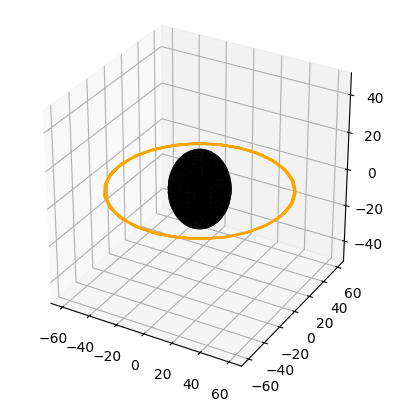

In [153]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.plot(xs,ys,zs,'k-',color="orange")
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='black')
ax.axis("equal")
ax.set_box_aspect([1,1,1])

In [ ]:
J = r**2*np.sin(teta)**2*dfi_dlamda
J #metros


## Grafico 3d mostrando el movimiento en en plano


In [ ]:
plt.figure(figsize=(16,16))
ax=plt.axes(projection="3d")
ax.plot([0], [0], [0],"*",markersize=10,label="Agujero Negro",color="negro")
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(-4,4)
ax.plot(r,teta,fi,)

ax.set_xlabel("Au")
ax.set_ylabel("Au")
ax.set_zlabel("Au")
ax.set_title("Movimiento ecuatorial",fontsize=30)
ax.legend()

# Espacio tiempo de Schwarzschild


In [ ]:
#introducir el espacio tiempo en coordenadas esfericas

# metrica de Schwarzchild en el espacio tiempo

In [ ]:
#desarroolar la geodesica con la metrica de shwarzchild
#desarrollar las constantes de movimiento
#simulacion de la caida vertical
#grafica del potencial efectivo
#grafica deflexion de la luz
#desarrollo de la precesion anomala del perihelio de mercurio